In [ ]:
# Based on the course of Bernd Klein : https://python-course.eu/machine-learning/neural-network-digits-dataset.php
# Modified by Mehdi Ammi, Univ. Paris 8

# Scikit-Learn: Multi-Layer Perceptron (MLP) 

## Introduction to Multi-Layer Perceptron 

MLP (Multi-Layer Perceptron) is a type of neural network with an architecture consisting of input, hidden, and output layers of interconnected neurons. It is capable of learning complex patterns and performing tasks such as classification and regression by adjusting its parameters through training. Let’s explore the architecture of an MLP in detail:

 - Input Layer: The input layer is where the MLP and dataset first engage with one another. A feature in the incoming data is matched to each neuron in this layer. For instance, each neuron might represent the intensity value of a pixel in picture categorization. These unprocessed input values are to be distributed to the neurons in the next hidden layers by the input layer.
 - Hidden Layers: MLPs have a hidden layer or layers that are present between the input and output layers. The main computations happen at these layers. Every neuron in a hidden layer analyzes the data that comes from the neurons in the layer above it. In the same buried layer, neurons do not interact directly with one another but rather indirectly via weighted connections. The hidden layer transformation allows the network to learn intricate links and representations in the data. The intricacy of the task might affect the depth (number of hidden layers) and width (number of neurons in each layer).
 - Output Layer: The MLP’s neurons in the output layer, the last layer, generate the model’s predictions. The structure of this layer is determined by the particular task at hand. The probability score for binary classification may be generated by a single neuron with a sigmoid activation function. Multiple neurons, often with softmax activation, can give probabilities to each class in a multi-class classification system. When doing regression tasks, the output layer frequently just has a single neuron that can forecast a continuous value.
 
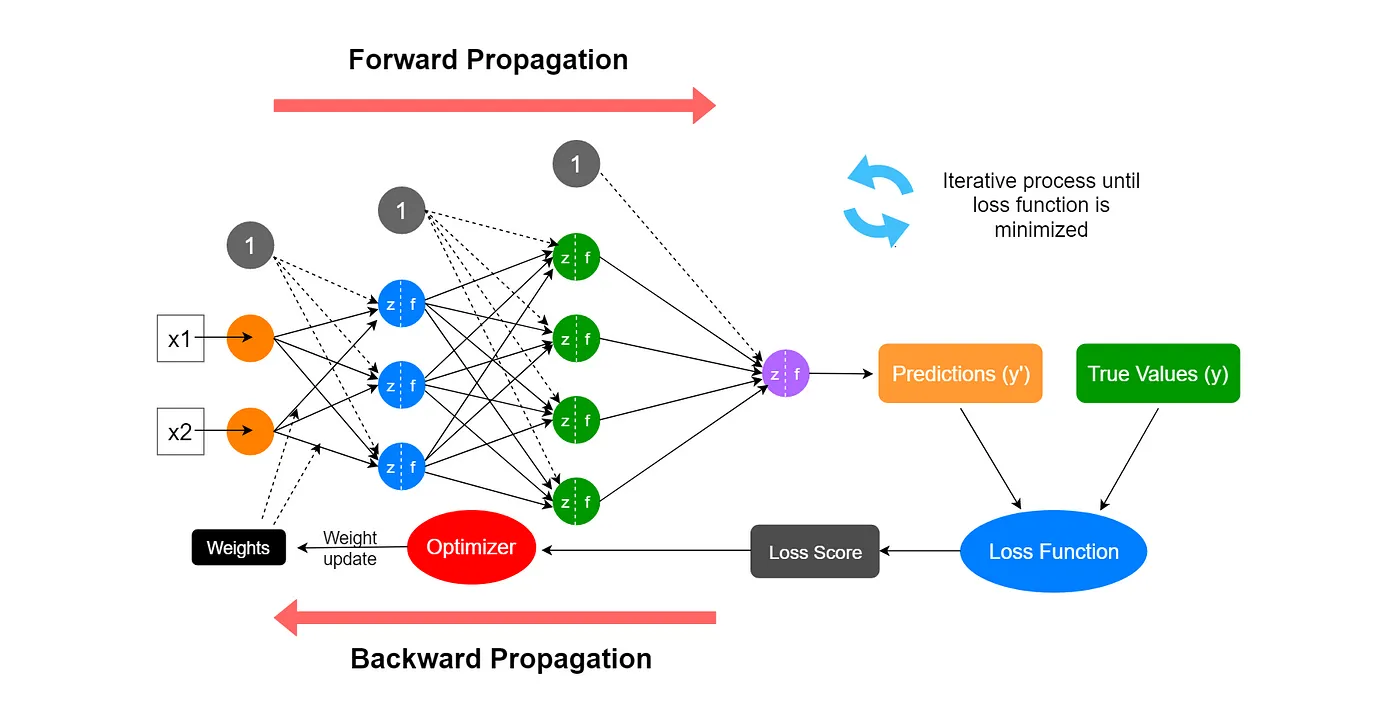

Working : 
 - Initialization: Set all of the network’s neurons’ weights (W) and biases (B) to their initial values. Usually, modest random numbers are used as initial values for these parameters.
 - Forward Propagation: Input data is passed through the network repeatedly during training. Each neuron in a layer takes in the weighted total of the inputs from the layer before it, applies an activation function, and sends the outcome to the layer after it. The model’s non-linearity is introduced via the activation functions, which enables it to learn intricate correlations.
 - Loss Calculation: A loss (error) is computed by comparing the network’s output to the actual goal values. Mean Squared Error (MSE) for regression and Cross-Entropy for classification are examples of common loss functions.
 - Backpropagation: In order to reduce the loss, the network modifies its biases and weights. The backpropagation algorithm accomplishes this by calculating gradients of the loss with respect to each network parameter. Through optimization techniques like Gradient Descent, these gradients are used to update the weights and biases.
 - Training: The forward propagation, loss estimation, and backpropagation processes are iterated across a number of iterations (epochs) until the model converges to a solution. A hyperparameter that can be modified is the learning rate and the number of iterations.
 - Prediction: By using forward propagation with the honed weights and biases, the MLP may be trained to make predictions on new, unobserved data.

Although MLPs are well renowned for their capacity to represent complicated relationships in data, they can be sensitive to certain hyperparameters, including the number of hidden layers and neurons, the choice of activation functions, and regularization strategies. For MLPs to operate well, proper hyperparameter adjustment is crucial.

## MLPClassifier in scikit-learn:

### Common Parameters of `MLPClassifier`

1. **hidden_layer_sizes**: tuple, length = n_layers - 2, default=(100,)
   - Specifies the number of neurons in each hidden layer. For example, `(100,)` creates a single hidden layer with 100 neurons, while `(100, 50)` creates two hidden layers with 100 and 50 neurons respectively.

2. **activation**: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
   - Activation function for the hidden layer:
     - `'identity'`: No activation (useful for linear bottleneck, return f(x) = x).
     - `'logistic'`: The logistic sigmoid function, 1 / (1 + exp(-x)).
     - `'tanh'`: The hyperbolic tan function, tanh(x).
     - `'relu'`: The rectified linear unit function, max(0, x).

3. **solver**: {'lbfgs', 'sgd', 'adam'}, default='adam'
   - Optimization algorithm:
     - `'lbfgs'`: Optimizer in the family of quasi-Newton methods.
     - `'sgd'`: Stochastic gradient descent.
     - `'adam'`: A combination of stochastic gradient descent with adaptive moment estimation.

4. **alpha**: float, default=0.0001
   - L2 penalty (regularization term) parameter to prevent overfitting by penalizing large weights.

5. **learning_rate**: {'constant', 'invscaling', 'adaptive'}, default='constant'
   - Learning rate schedule for weight updates:
     - `'constant'`: Keeps the learning rate constant.
     - `'invscaling'`: Decreases learning rate at each time step `t` using `learning_rate_ / pow(t, power_t)`.
     - `'adaptive'`: Keeps the learning rate constant to `learning_rate_init` as long as training loss keeps decreasing.

6. **learning_rate_init**: float, default=0.001
   - Initial learning rate used by the solver. It controls the step size in updating the weights.

7. **max_iter**: int, default=200
   - Maximum number of iterations. The solver iterates until convergence or this number of iterations.

8. **random_state**: int, RandomState instance, default=None
   - Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when `solver='sgd'` or `'adam'`. Setting this parameter to an integer ensures reproducibility.

9. **tol**: float, default=1e-4
    - Tolerance for the optimization. When the loss or score is not improving by at least `tol` for `n_iter_no_change` consecutive iterations, convergence is considered to be reached and training stops.

10. **early_stopping**: bool, default=False
    - Whether to use early stopping to terminate training when validation score is not improving. If set to `True`, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least `tol` for `n_iter_no_change` consecutive epochs.

11. **validation_fraction**: float, default=0.1
    - The proportion of training data to set aside as validation set for early stopping. Used only if `early_stopping` is `True`.

## Importing required libraries

In [ ]:
import matplotlib.pyplot as plt

## Loading Data
We will first load the digits data:

In [ ]:
# Import the load_digits function from sklearn.datasets
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

We can get an overview of what is contained in the dataset with the keys method:

In [ ]:
# Get the keys of the digits dataset dictionary
digits.keys()

In [ ]:
>>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The digits dataset contains 1797 images and each images contains 64 features, which correspond to the pixels:

In [ ]:
# Get the number of samples (images) and the number of features (pixels per image) from the digits dataset
n_samples, n_features = digits.data.shape

# Print the number of samples and features
print((n_samples, n_features))

In [ ]:
>>
(1797, 64)

In [ ]:
# Print the feature data (pixel values) of the first sample (image) in the digits dataset
print(digits.data[0])

In [ ]:
>>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

In [ ]:
# Print the target labels of the digits dataset
print(digits.target)

In [ ]:
>>
[0 1 2 ... 8 9 8]

The data is also available at digits.images. This is the raw data of the images in the form of 8 lines and 8 columns.

With "data" an image corresponds to a one-dimensional Numpy array with the length 64, and "images" representation contains 2-dimensional numpy arrays with the shape (8, 8)

In [ ]:
# Print the shape and data type of the first item's feature data
print("Shape of an item: ", digits.data[0].shape)  # Shape of the flattened pixel values of the first image
print("Data type of an item: ", type(digits.data[0]))  # Data type of the flattened pixel values of the first image

# Print the shape and data type of the first item's image data
print("Shape of an item: ", digits.images[0].shape)  # Shape of the 8x8 pixel grid of the first image
print("Data type of an item: ", type(digits.images[0]))  # Data type of the 8x8 pixel grid of the first image

In [ ]:
>>
Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>

Let's visualize the data:

In [ ]:
# Import the matplotlib.pyplot module as plt
import matplotlib.pyplot as plt

# Display the first image in the digits dataset
plt.imshow(digits.images[0], cmap='binary')  # Show the first image in grayscale
plt.show()  # Display the image plot

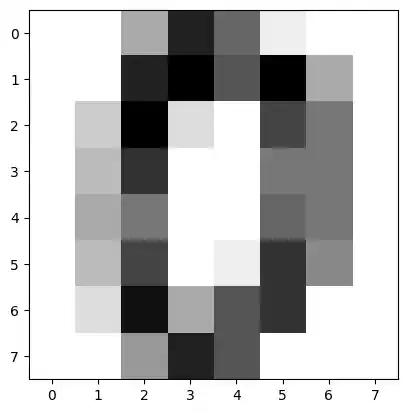

## Displaying Digit Images with Labels

Let's visualize some more digits combined with their labels.

First, 64 images in an 8x8 grid, each image labeled with its corresponding target value.

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

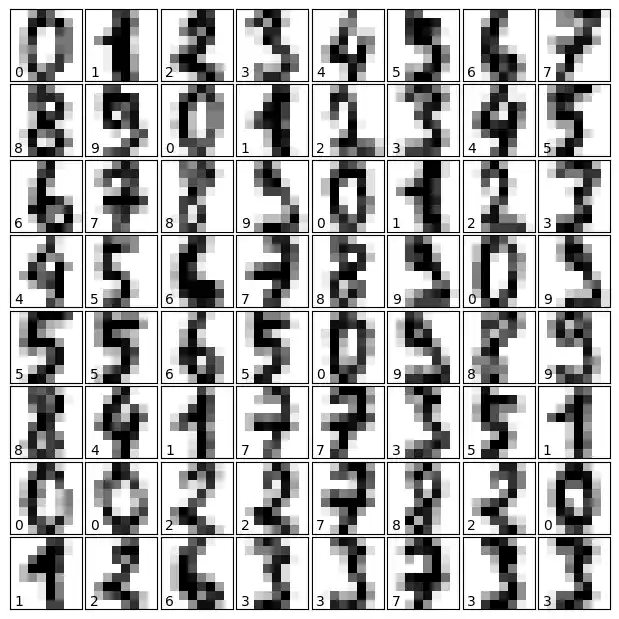

Second, 144 images in an 12x12 grid, each image labeled with its corresponding target value.

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

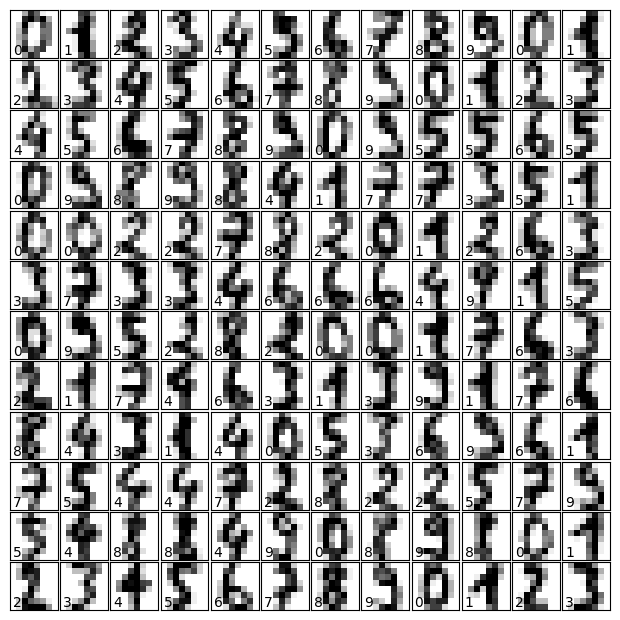

## Splitting the Dataset

We begin by splitting the dataset into training and testing sets using the train_test_split function from sklearn.model_selection. The digits.data and digits.target are divided such that 80% is used for training and 20% for testing, ensuring reproducibility with random_state=1. This results in train_data, test_data, train_labels, and test_labels, which are used for training and evaluating the model.

In [ ]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# digits.data: feature data of the digits dataset
# digits.target: labels of the digits dataset
# train_size=0.8: 80% of the data will be used for training
# test_size=0.2: 20% of the data will be used for testing
# random_state=1: ensures the split is reproducible
res = train_test_split(digits.data, digits.target, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

# Unpack the result into training data, testing data, training labels, and testing labels
train_data, test_data, train_labels, test_labels = res 

## Creating and Configuring the MLP Classifier

Next, we create a neural network classifier using the MLPClassifier from sklearn.neural_network. The classifier is configured with a single hidden layer of 5 neurons, logistic activation function, L2 regularization (alpha=1e-4), stochastic gradient descent solver, tolerance of 1e-4, initial learning rate of 0.3, and verbosity enabled. This setup prepares the neural network for training and evaluation.

In [ ]:
# Import the MLPClassifier from sklearn.neural_network
from sklearn.neural_network import MLPClassifier

# Create and configure the MLPClassifier (multi-layer perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(5,),   # Single hidden layer with 5 neurons
                    activation='logistic',     # Logistic sigmoid function as the activation function
                    alpha=1e-4,                # L2 regularization term (to prevent overfitting)
                    solver='sgd',              # Stochastic gradient descent as the optimization algorithm
                    tol=1e-4,                  # Tolerance for the optimization (training stops when the loss improves by less than this value)
                    random_state=1,            # Ensures reproducibility of results
                    learning_rate_init=.3,     # Initial learning rate for weight updates
                    verbose=True)              # Enables verbose output during the training process to monitor progress

# Fit the model to the training data
# train_data: the input data used for training
# train_labels: the corresponding labels for the training data
mlp.fit(train_data, train_labels)

In [ ]:
>>
Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
....
....
Iteration 47, loss = 0.52758831
Iteration 48, loss = 0.57442797
Iteration 49, loss = 0.54783549
Iteration 50, loss = 0.52590142
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

MLPClassifier
MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

## Make predictions

In [ ]:
# Use the trained MLPClassifier model to make predictions on the test data
predictions = mlp.predict(test_data)

# Display the first 25 predictions and their corresponding true labels from the test set
predictions[:25], test_labels[:25]

In [ ]:
>>
(array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 1, 8, 4, 1, 7, 3, 7, 1, 1, 1,
        8, 6, 0]),
 array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
        8, 6, 0]))

## Display the accuracy score

In [ ]:
# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate and return the accuracy of the model's predictions
# test_labels: the true labels of the test data
# predictions: the labels predicted by the model
accuracy = accuracy_score(test_labels, predictions)

# Display the accuracy score
accuracy

In [ ]:
>>
0.8194444444444444

## Exploring the Effect of Hidden Layer Size on Neural Network Performance

We experiment with different configurations of the neural network by varying the number of neurons in the hidden layer and evaluating the model's performance for each configuration. The loop runs through different numbers of neurons, from 5 to 34, creating and training an MLPClassifier with the specified number of neurons in the hidden layer each time. After training the model, it makes predictions on the test data and calculates the accuracy of these predictions. Finally, it prints the number of neurons and the corresponding accuracy score. This process helps us understand how the number of neurons in the hidden layer affects the model's performance and find the optimal configuration.

In [ ]:
# Loop over a range of values for the number of neurons in the hidden layer
for i in range(5, 35):
    # Create and configure the MLPClassifier with the current number of neurons
    mlp = MLPClassifier(hidden_layer_sizes=(i,),   # Single hidden layer with 'i' neurons
                        activation='logistic',     # Logistic sigmoid function as the activation function
                        random_state=1,            # Ensures reproducibility of results
                        alpha=1e-4,                # L2 regularization term to prevent overfitting
                        max_iter=10000,            # Maximum number of iterations to train the model
                        solver='sgd',              # Stochastic gradient descent as the optimization algorithm
                        tol=1e-4,                  # Tolerance for the optimization (training stops when the loss improves by less than this value)
                        learning_rate_init=.3,     # Initial learning rate for weight updates
                        verbose=False)             # Disables verbose output during the training process

    # Fit the model to the training data
    mlp.fit(train_data, train_labels)

    # Use the trained model to make predictions on the test data
    predictions = mlp.predict(test_data)

    # Calculate the accuracy of the model's predictions
    acc_score = accuracy_score(test_labels, predictions)

    # Print the current number of neurons and the corresponding accuracy score
    print(i, acc_score)

In [ ]:
>>
5 0.8194444444444444
6 0.8777777777777778
7 0.8777777777777778
8 0.8444444444444444
9 0.8722222222222222
10 0.9083333333333333
11 0.9194444444444444
12 0.9416666666666667
13 0.9611111111111111
14 0.9666666666666667
15 0.9305555555555556
16 0.9611111111111111
17 0.8111111111111111
18 0.9527777777777777
19 0.9361111111111111
20 0.9694444444444444
21 0.9638888888888889
22 0.9388888888888889
23 0.9555555555555556
24 0.9694444444444444
25 0.9611111111111111
26 0.975
27 0.9694444444444444
28 0.9555555555555556
29 0.9611111111111111
30 0.9694444444444444
31 0.9694444444444444
32 0.975
33 0.9694444444444444
34 0.9666666666666667

## Visualizing the MLP Classifier's Predictions

Here we train the MLP with the initial parameters, use it to make predictions on the test data, and visually compare some of the predicted labels with the actual labels by displaying the corresponding images.

In [ ]:
# Configure the MLPClassifier with the initial parameters
mlp = MLPClassifier(hidden_layer_sizes=(5,),   # Single hidden layer with 5 neurons
                    activation='logistic',     # Logistic sigmoid function as the activation function
                    alpha=1e-4,                # L2 regularization term (to prevent overfitting)
                    solver='sgd',              # Stochastic gradient descent as the optimization algorithm
                    tol=1e-4,                  # Tolerance for the optimization (training stops when the loss improves by less than this value)
                    random_state=1,            # Ensures reproducibility of results
                    learning_rate_init=.3,     # Initial learning rate for weight updates
                    verbose=False)              # Enables verbose output during the training process to monitor progress

# Fit the model to the training data
mlp.fit(train_data, train_labels)

# Faire des prédictions sur les données de test
predictions = mlp.predict(test_data)

# Afficher quelques images de test avec leurs prédictions et étiquettes réelles
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"Pred: {predictions[i]}\nTrue: {test_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

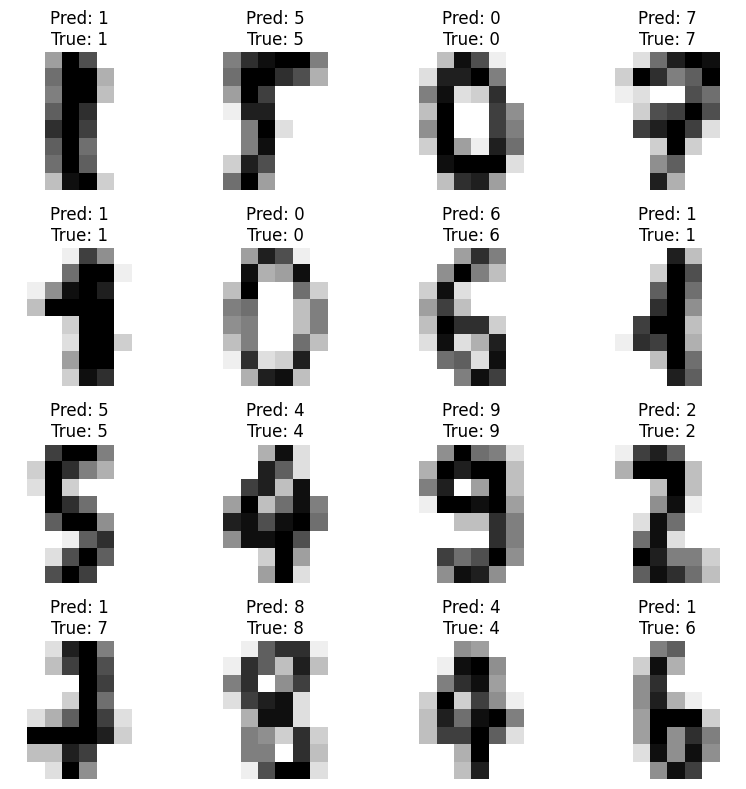

## Exercices

### Exercise 1: Data Preprocessing
- Split the data into training and testing sets (80%/20%).
- Display the shape of the training and testing sets.
- Print the first labels of the training and testing sets.

### Exercise 2: Configuring the MLP Classifier
- Create an MLPClassifier with a hidden layer of 5 neurons and a `logistic` activation function.
- Train the model on the training set.
- Display the loss iterations during training.

### Exercise 3: Prediction and Evaluation
- Use the trained model to predict the labels of the test set.
- Display the first 25 predictions and their corresponding true labels.
- Calculate and display the accuracy of the model.

### Exercise 4: Experimenting with the Number of Neurons
- Create a loop to train the model with hidden layer sizes ranging from 5 to 10 neurons.
- For each model, calculate the accuracy and display the number of neurons and the corresponding accuracy.

### Exercise 5: Changing Activation Functions
- Train the model with activation functions `relu`, `tanh`, and `identity`.
- Calculate the accuracy for each activation function.
- Compare the performance of the different models.

### Exercise 6: Using Different Solvers
- Train the model with solvers `lbfgs`, `sgd`, and `adam`.
- Calculate the accuracy for each solver.
- Compare the performance of the different solvers.

### Exercise 7: Adjusting L2 Regularization Parameter
- Train the model with `alpha` values of 0.0001, 0.001, and 0.01.
- Calculate the accuracy for each `alpha` value.
- Analyze the impact of L2 regularization on performance.

### Exercise 8: Modifying Initial Learning Rate
- Train the model with `learning_rate_init` values of 0.001, 0.01, and 0.1.
- Calculate the accuracy for each `learning_rate_init` value.
- Discuss the importance of initial learning rate on model convergence.

### Exercise 9: Using Early Stopping
- Train the model with `early_stopping=True` and `early_stopping=False`.
- Calculate the accuracy for each configuration.
- Evaluate the impact of early stopping on performance and training time.

### Exercise 10: MLP Classification on the "Iris" Dataset
Perform MLP classification on the Iris dataset to classify different species of Iris flowers. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the Iris Dataset: Use the `load_iris()` function from `sklearn.datasets` to load the Iris dataset.
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(5,)`, `(10,)`, `(5,5)`). Observe the changes in accuracy.
- Change Activation Functions: Experiment with different activation functions (`relu`, `tanh`, `identity`). Observe the impact on model performance.
- Try Different Solvers: Use different solvers (`lbfgs`, `sgd`, `adam`). Compare their effects on training time and accuracy.

### Exercise 11: MLP Regression on the "Boston Housing" Dataset
Perform MLP regression on the Boston Housing dataset to predict housing prices. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the Boston Housing Dataset: Use the `load_boston()` function from `sklearn.datasets` to load the Boston Housing dataset.
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(50,)`, `(100,)`, `(50,50)`). Observe the changes in the mean squared error.
- Change Activation Functions: Experiment with different activation functions (`relu`, `tanh`, `identity`). Observe the impact on model performance.
- Try Different Solvers: Use different solvers (`lbfgs`, `sgd`, `adam`). Compare their effects on training time and mean squared error.

### Exercise 12: MLP Regression on the "Linnerud" Dataset
Perform MLP regression on the Linnerud dataset to predict exercise data. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the Linnerud Dataset: Use the `load_linnerud()` function from `sklearn.datasets` to load the Linnerud dataset.
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(50,)`, `(100,)`, `(50,50)`). Observe the changes in the mean squared error.
- Change Activation Functions: Experiment with different activation functions (`relu`, `tanh`, `identity`). Observe the impact on model performance.
- Try Different Solvers: Use different solvers (`lbfgs`, `sgd`, `adam`). Compare their effects on training time and mean squared error.

### Exercise 13: MLP Regression on the "California Housing" Dataset
Perform MLP regression on the California Housing dataset to predict housing prices. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the California Housing Dataset: Use the `fetch_california_housing()` function from `sklearn.datasets` to load the California Housing dataset.
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(50,)`, `(100,)`, `(50,50)`). Observe the changes in the mean squared error.
- Change Activation Functions: Experiment with different activation functions (`relu`, `tanh`, `identity`). Observe the impact on model performance.
- Try Different Solvers: Use different solvers (`lbfgs`, `sgd`, `adam`). Compare their effects on training time and mean squared error.

### Exercise 14: MLP Regression on the "Diabetes" Dataset
Perform MLP regression on the Diabetes dataset to predict disease progression. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the Diabetes Dataset: Use the `load_diabetes()` function from `sklearn.datasets` to load the Diabetes dataset.
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(50,)`, `(100,)`, `(50,50)`). Observe the changes in the mean squared error.
- Change Activation Functions: Experiment with different activation functions (`relu`, `tanh`, `identity`). Observe the impact on model performance.
- Try Different Solvers: Use different solvers (`lbfgs`, `sgd`, `adam`). Compare their effects on training time and mean squared error.

### Exercise 15: MLP Classification on the "Olive Oil" Dataset
Perform MLP classification on the Olive Oil dataset to classify different types of olive oil. Experiment with different hidden layer sizes, activation functions, and solvers to optimize the model's performance.

**Instructions:**

- Load the Olive Oil Dataset: Load the Olive Oil dataset from a suitable source (e.g., download from UCI Machine Learning Repository).
- Experiment with Hidden Layer Sizes: Modify the code to use different hidden layer sizes (e.g., `(50